In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.patches as mpatches
import seaborn as sns
import os
#plt.style.use('seaborn-dark')
from matplotlib.patches import Rectangle
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
from sklearn.preprocessing import normalize

In [89]:
lat_list= []
sum_=0
lat=3
for i in range(lat):
    name= "fa_500/lat_ga_5k_5_" + str(i) + ".npy"
    #name= "fi/lat_ga_1k_2.npy"
    temp= np.load(name).reshape(111,50)
    sum_ = sum_ + temp
    lat_list.append(temp)
sum_ = sum_/lat
    #lat1= lat1.reshape(111,51)
#lat2= lat2.reshape(111,51)

In [90]:
lat = sum_
#lat.tofile("com_avg.csv")
lat= np.round(lat,4)
np.savetxt("com_avg.csv", lat, delimiter= ',',fmt='%4f')

In [91]:
lat[0]

array([0.0003, 0.0003, 0.0002, 0.0001, 0.0041, 0.0010, 0.0007, 0.0012,
       0.0019, 0.0014, 0.0015, 0.0013, 0.0005, 0.0001, 0.0006, 0.0028,
       0.0001, 0.0012, 0.0001, 0.0005, 0.0003, 0.0001, 0.0003, 0.0002,
       0.0002, 0.0002, 0.0005, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0076, 0.0004, 0.0012, 0.0019, 0.0017, 0.0012, 0.0001, 0.0001,
       0.0047, 0.0015, 0.0045, 0.0014, 0.0027, 0.0036, 0.0022, 0.0001,
       0.0036, 0.0062], dtype=float32)

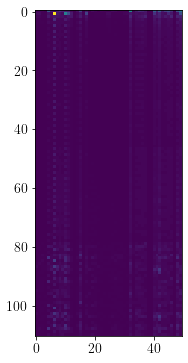

In [92]:
plt.figure(figsize=(10, 6))
plt.imshow(lat)
plt.show()

In [161]:
def per(a):
    return (a/np.sum(a))*100

In [162]:
context= np.sum(lat,axis=1)

In [163]:
context

array([0.0668, 0.0560, 0.0270, 0.0135, 0.0111, 0.0109, 0.0074, 0.0086,
       0.0068, 0.0085, 0.0055, 0.0075, 0.0058, 0.0063, 0.0042, 0.0063,
       0.0049, 0.0061, 0.0041, 0.0051, 0.0040, 0.0047, 0.0035, 0.0052,
       0.0042, 0.0050, 0.0037, 0.0045, 0.0038, 0.0041, 0.0033, 0.0058,
       0.0050, 0.0065, 0.0041, 0.0049, 0.0041, 0.0044, 0.0035, 0.0046,
       0.0041, 0.0046, 0.0039, 0.0037, 0.0036, 0.0039, 0.0032, 0.0066,
       0.0061, 0.0072, 0.0054, 0.0060, 0.0056, 0.0063, 0.0051, 0.0063,
       0.0060, 0.0076, 0.0062, 0.0066, 0.0068, 0.0070, 0.0062, 0.0070,
       0.0076, 0.0082, 0.0064, 0.0068, 0.0071, 0.0064, 0.0055, 0.0069,
       0.0075, 0.0065, 0.0047, 0.0064, 0.0069, 0.0051, 0.0039, 0.0098,
       0.0136, 0.0137, 0.0071, 0.0150, 0.0189, 0.0120, 0.0106, 0.0168,
       0.0167, 0.0119, 0.0070, 0.0109, 0.0142, 0.0060, 0.0076, 0.0093,
       0.0122, 0.0096, 0.0055, 0.0103, 0.0116, 0.0090, 0.0076, 0.0175,
       0.0196, 0.0100, 0.0066, 0.0160, 0.0189, 0.0074, 0.0083],
      dtype=f

In [228]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('font',size=16)

0

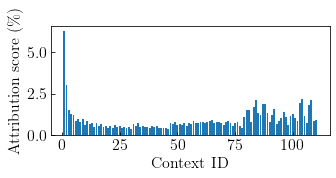

In [229]:
# Importance of each context
context= np.sum(lat[0:111],axis=1)
xc=per(context[1:111].flatten())
xc.shape
#np.sum(xc,axis=0)
ab= [i for i in range(1,111)]
fig,ax=plt.subplots(figsize=(5,2))
barlist=ax.bar(ab,xc[0:110])
#ax.set_ylabel(' Attribution score')
ax.set_ylabel('Attribution score (\%)')
#fig.set_xticklabels(list(df.index.values),rotation=0)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_xlabel('Context ID')
figure = ax.get_figure()
name= 'context_imp'
pdf_name = name+'.pdf'
figure.savefig(pdf_name, bbox_inches='tight')
os.system(f"pdfcrop {pdf_name} {pdf_name}")

In [230]:
np.sum(context)

0.96339995

In [231]:
np.sum(lat[1:111],axis=0).shape

(50,)

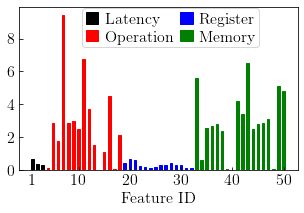

In [245]:
# Importance of each feature context instr
feat= np.sum(lat[1:111],axis=0)
#feat= lat[0]
#feat[0:3]=0
feat=per(feat)
#feat= remaining
xc=(feat.flatten())
xc.shape
#np.sum(xc,axis=0)
ab= [i for i in range(1,51)]
fig,ax=plt.subplots(figsize=(5,3))
barlist=ax.bar(ab,xc,width=0.5)
for i in range(0,3):
    barlist[i].set_color('black')
for i in range(3,18):
    barlist[i].set_color('r')
for i in range(18,32):
    barlist[i].set_color('b')
for i in range(32,50):
    barlist[i].set_color('g')
# for i in range(41,50):
#     barlist[i].set_color('purple')
#ax.set_y
black_patch = mpatches.Patch(color='black', label='Latency')
blue_patch = mpatches.Patch(color='red', label='Operation')
green_patch = mpatches.Patch(color='blue', label='Register')
purple_patch = mpatches.Patch(color='green', label='Memory')
ax.legend(handles=[black_patch,blue_patch,green_patch,purple_patch],handlelength=0.8, ncol=2, columnspacing=0.4, labelspacing=0.1,handletextpad=0.4,borderpad=0.2,bbox_to_anchor=(0.2,1.04))
#fig.set_xticklabels(list(df.index.values),rotation=0)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_xlabel('Feature ID')
# ax.set_xticklabels([0,1,10,20,30,40,50])
# ax.set_xlim(0, 52)
#ax.set_title('Context instruction')
#rect = Rectangle( (0,0), 0.05, 0.05, linestyle = '-', facecolor = 'red', clip_on=False)
#ax.add_patch(rect1)
# ax.add_patch(rect2)
# ax.add_patch(rect3)
#x_ticks = ax.get_xticks()
ax.set_xticks([1,10,20,30,40,50])
# x_locator = FixedLocator([1, 10, 20, 30,40,50])
# x_formatter= FixedFormatter()
# ax.xaxis.set_major_formatter(x_formatter)
figure = ax.get_figure()
name= 'context_feature_imp'
pdf_name = name+'.pdf'
figure.savefig(pdf_name, bbox_inches='tight')
os.system(f"pdfcrop {pdf_name} {pdf_name}")

curr_importance[0]= np.sum(cur[0:3])
curr_importance[1]= np.sum(cur[3:18])
curr_importance[2]= np.sum(cur[18:32])
curr_importance[3]= np.sum(cur[32:40])
curr_importance[4]= np.sum(cur[40:51])

In [233]:
x_ticks

array([-10.0000, 0.0000, 10.0000, 20.0000, 30.0000, 40.0000, 50.0000,
       60.0000])

In [234]:
feat

array([0.6692, 0.3904, 0.2900, 0.1338, 2.8775, 1.7399, 9.4580, 2.8329,
       2.9556, 2.4760, 6.7700, 3.7252, 1.5057, 0.0223, 1.1153, 4.4948,
       0.0335, 2.1303, 0.4127, 0.6803, 0.6023, 0.2231, 0.2008, 0.1115,
       0.1561, 0.2788, 0.3234, 0.4015, 0.3123, 0.3234, 0.1450, 0.1115,
       5.5989, 0.5800, 2.5764, 2.6879, 2.8106, 2.3533, 0.0335, 0.0223,
       4.2271, 3.4017, 6.5247, 2.5206, 2.8106, 2.8664, 3.0783, 0.0446,
       5.1416, 4.8182], dtype=float32)

0

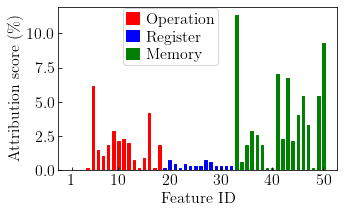

In [247]:
# Importance of each feature current instr
feat= lat[0]
feat[0:3]=0
feat=per(feat)
#feat= remaining
xc=(feat.flatten())
xc.shape
#np.sum(xc,axis=0)
ab= [i for i in range(1,51)]
fig,ax=plt.subplots(figsize=(5,3))
barlist=ax.bar(ab,xc,width=0.5)
for i in range(3,18):
    barlist[i].set_color('r')
for i in range(18,32):
    barlist[i].set_color('b')
for i in range(32,50):
    barlist[i].set_color('g')
    
#black_patch = mpatches.Patch(color='black', label='Latencies')
blue_patch = mpatches.Patch(color='red', label='Operation')
green_patch = mpatches.Patch(color='blue', label='Register')
purple_patch = mpatches.Patch(color='green', label='Memory')
ax.legend(handles=[blue_patch,green_patch,purple_patch],handlelength=0.8, ncol=1, columnspacing=0.4, labelspacing=0.1,handletextpad=0.4,borderpad=0.2,bbox_to_anchor=(0.6,1.04))
#ax.set_ylabel('Attribution score (\%)')
#fig.set_xticklabels(list(df.index.values),rotation=0)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_xlabel('Feature ID')
ax.set_ylabel('Attribution score (\%)')
ax.set_xticks([1,10,20,30,40,50])
#ax.set_title('to-be-predicted instruction')
#rect = Rectangle( (0,0), 0.05, 0.05, linestyle = '-', facecolor = 'red', clip_on=False)
#ax.add_patch(rect1)
# ax.add_patch(rect2)
# ax.add_patch(rect3)

figure = ax.get_figure()
name= 'current_feature_imp'
pdf_name = name+'.pdf'
figure.savefig(pdf_name, bbox_inches='tight')
os.system(f"pdfcrop {pdf_name} {pdf_name}")

In [236]:
np.sum(xc)

99.99999

### New analysis

In [99]:
# CUrrent instruction

names= [
"latencies",
"control",
"register",
"fetch",
"data"]
cur= lat[0]
remaining= lat[1:111]
context=np.sum(remaining,axis=0)
curr_importance= np.zeros(5)
context_importance= np.zeros(5)

curr_importance[0]= np.sum(cur[0:3])
curr_importance[1]= np.sum(cur[3:18])
curr_importance[2]= np.sum(cur[18:32])
curr_importance[3]= np.sum(cur[32:40])
curr_importance[4]= np.sum(cur[40:51])

context_importance[0]= np.sum(context[0:3])
context_importance[1]= np.sum(context[3:18])
context_importance[2]= np.sum(context[18:32])
context_importance[3]= np.sum(context[32:40])
context_importance[4]= np.sum(context[40:51])

In [100]:
#Control
cur[3:18]

array([0.0001, 0.0041, 0.0010, 0.0007, 0.0012, 0.0019, 0.0014, 0.0015,
       0.0013, 0.0005, 0.0001, 0.0006, 0.0028, 0.0001, 0.0012],
      dtype=float32)

In [101]:
#Register
cur[18:32]

array([0.0001, 0.0005, 0.0003, 0.0001, 0.0003, 0.0002, 0.0002, 0.0002,
       0.0005, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002], dtype=float32)

In [102]:
#fetch
cur[32:40]

array([0.0076, 0.0004, 0.0012, 0.0019, 0.0017, 0.0012, 0.0001, 0.0001],
      dtype=float32)

In [103]:
cur[40:51]

array([0.0047, 0.0015, 0.0045, 0.0014, 0.0027, 0.0036, 0.0022, 0.0001,
       0.0036, 0.0062], dtype=float32)

In [104]:
curr_importance

array([0.0008, 0.0185, 0.0036, 0.0142, 0.0305])

0

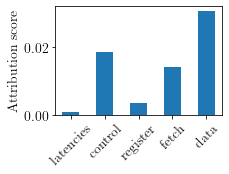

In [105]:
ab= [i for i in range(0,5)]
fig,ax=plt.subplots(figsize= (3,2))
#fig.canvas_draw()
#ax.bar(curr_importance,ab , width=0.5)
ax.bar(ab, curr_importance, width=0.5)
#labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_ylabel(' Attribution score')
ax = plt.gca()
ax.set_xticks(np.arange(len(ab)))
ax.set_xticklabels(names, ha='center', rotation=45)
#ax.xaxis.grid(True, which='major')
#ax.yaxis.grid(True, which='major')
name= 'curr_feature_imp'
pdf_name = name+'.pdf'
fig.savefig(pdf_name, bbox_inches='tight')
os.system(f"pdfcrop {pdf_name} {pdf_name}")

0

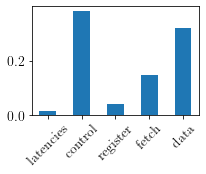

In [31]:
ab= [i for i in range(0,5)]
fig,ax=plt.subplots(figsize= (3,2))
#fig.canvas_draw()
#ax.bar(curr_importance,ab , width=0.5)
ax.bar(ab, context_importance, width=0.5)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_ylabel(' Attribution score')
ax = plt.gca()
ax.set_xticks(np.arange(len(ab)))
ax.set_xticklabels(names, ha='center', rotation=45)
#ax.xaxis.grid(True, which='major')
#ax.yaxis.grid(True, which='major')
name= 'context_feature_imp'
pdf_name = name+'.pdf'
fig.savefig(pdf_name, bbox_inches='tight')
os.system(f"pdfcrop {pdf_name} {pdf_name}")

In [20]:
ab

[0, 1, 2, 3, 4]

In [21]:
names

['latencies', 'control', 'register', 'fetch', 'data']

In [22]:
cur[0:3]

array([0.0003, 0.0002, 0.0002], dtype=float32)